# Import dependencies

In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Dataset cleaning

In [2]:
# Import our input dataset
travel_ins_df = pd.read_csv('Resources/travel insurance.csv')
print(travel_ins_df.shape)
travel_ins_df.head()

(63326, 11)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [3]:
travel_ins_df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [4]:
# Checking for nulls
travel_ins_df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [5]:
# Drop the Gender column
travel_ins_df.drop(columns=["Gender"], inplace=True)

In [6]:
print(travel_ins_df.shape)
travel_ins_df.head()

(63326, 10)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [7]:
# Generate our categorical variable list
travel_cat = travel_ins_df.dtypes[travel_ins_df.dtypes == "object"].index.tolist()
travel_cat

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Claim',
 'Destination']

In [8]:
# Check the number of unique values in each column
travel_ins_df[travel_cat].nunique()

Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Claim                     2
Destination             149
dtype: int64

In [9]:
# Look at Agency value counts
agency = travel_ins_df["Agency"].value_counts()
agency

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

In [10]:
# Look at Agency Type value counts
agency_type = travel_ins_df["Agency Type"].value_counts()
agency_type

Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

In [11]:
# Look at Distribution Channel value counts
distr_channel = travel_ins_df["Distribution Channel"].value_counts()
distr_channel

Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

In [12]:
# Look at Product Name value counts
prod_name = travel_ins_df["Product Name"].value_counts()
prod_name

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Annual Gold Plan                          194
Premier Plan                              194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [13]:
# Look at Claim value counts
claim = travel_ins_df["Claim"].value_counts()
claim

No     62399
Yes      927
Name: Claim, dtype: int64

In [14]:
# Transform string column
def change_string(claim):
    if claim == "Yes":
        return 1
    else:
        return 0

travel_ins_df["Claim"] = travel_ins_df["Claim"].apply(change_string)
print(travel_ins_df.shape)
travel_ins_df.head()

(63326, 10)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41


In [15]:
# Look at Destination value counts
destin = travel_ins_df["Destination"].value_counts()
destin

SINGAPORE                 13255
MALAYSIA                   5930
THAILAND                   5894
CHINA                      4796
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

In [16]:
# Check Duration column if any negative
duration_neg = travel_ins_df["Duration"].sort_values(ascending=True)
duration_neg.head(70)

14943   -2
52587   -1
52588   -1
59528   -1
56668   -1
        ..
55499    0
22072    1
50845    1
50840    1
50799    1
Name: Duration, Length: 70, dtype: int64

In [17]:
# Remove negative values of the Duration column
travel_ins_df = travel_ins_df.loc[travel_ins_df["Duration"] > 0]

In [18]:
# Check Duration column on max data
duration = travel_ins_df["Duration"].sort_values(ascending=False)
duration.head(20)

3025     4881
6847     4857
8686     4847
9232     4844
12059    4831
12438    4829
15281    4815
21916    4784
30437    4738
30826    4736
39842    4685
41391    4652
49722    4609
55326    4580
14147     740
24165     547
46303     545
55116     531
51153     529
36022     529
Name: Duration, dtype: int64

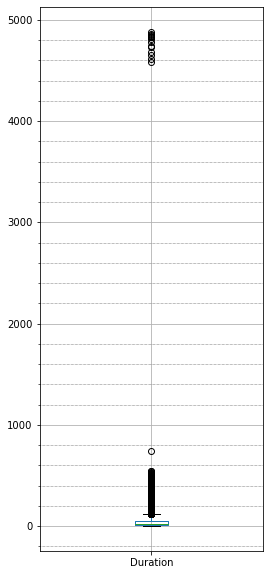

In [19]:
# Create a boxplot for Duration
fig, ax = plt.subplots(figsize=(4,10))
travel_ins_df.boxplot(column='Duration', return_type='axes')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [20]:
# Remove Duration > 550 outliers
travel_ins_df = travel_ins_df.loc[travel_ins_df["Duration"] < 550]

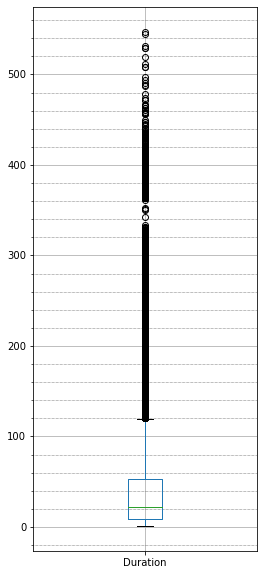

In [21]:
# Create a boxplot for Duration to check
fig, ax = plt.subplots(figsize=(4,10))
travel_ins_df.boxplot(column='Duration', return_type='axes')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [22]:
# Check Age column if any negative
age_neg = travel_ins_df["Age"].sort_values(ascending=True)
age_neg.head()

41993    0
52109    0
57748    1
63211    1
57555    1
Name: Age, dtype: int64

In [23]:
# Check Age column on max data
age = travel_ins_df["Age"].sort_values(ascending=False)
age.head()

42341    118
44566    118
7672     118
7640     118
45676    118
Name: Age, dtype: int64

In [24]:
# Get the number of ages
age_count = travel_ins_df.groupby(["Age"]).count()["Claim"]
age_count

Age
0        2
1        5
2        1
3        4
4        1
      ... 
85       9
86       4
87       8
88       4
118    955
Name: Claim, Length: 89, dtype: int64

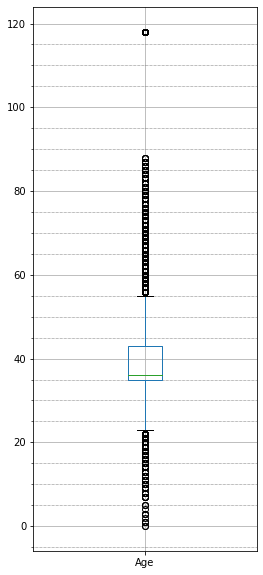

In [25]:
# Create a boxplot for Age
fig, ax = plt.subplots(figsize=(4,10))
travel_ins_df.boxplot(column='Age', return_type='axes')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [26]:
# Remove 118 years outlier
travel_ins_df = travel_ins_df.loc[travel_ins_df["Age"] < 118]

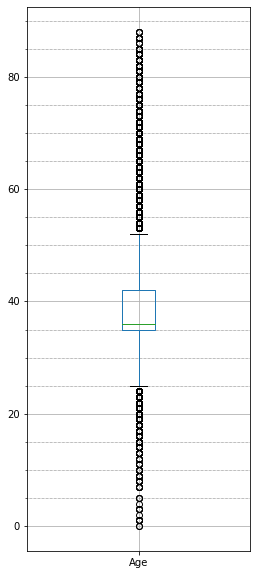

In [27]:
# Create a boxplot for Age to check
fig, ax = plt.subplots(figsize=(4,10))
travel_ins_df.boxplot(column='Age', return_type='axes')
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [28]:
print(travel_ins_df.shape)
travel_ins_df.head()

(62290, 10)


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,41


In [29]:
travel_ins_df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
dtype: object

In [30]:
# Saving cleaned data
travel_ins_df.to_csv('Resources/travel_insurance_clean.csv', index=False)